# Skin Lesion Prediction- ETL - Data Cleaning
This task is to transform the data into data suitable for analytics.
It involves cleaning the data, extracting the features and joining another dataset.

### Data Cleaning
You can use the following non-exhaustive list as guidelines:
    
    
#### * Data types
  Are data types of columns matching their content? E.g. is age stored as integer and not as string?
#### * Ranges
  Does the value distribution of values in a column make sense? Use stats (e.g. min, max, mean, standard  
  deviation) and visualizations (e.g. box-plot, histogram) for help. 
#### * Emptiness
  Are all values non-null where mandatory? E.g. client IDs
#### * Uniqueness
  Are duplicates present where undesired? E.g. client IDs
#### * Set Memberships
  Are only allowed values chosen for categorical or ordinal fields? E.g. Female, Male, Unknown
#### * Foreign Memberships
  Are only allowed values chosen a field?
#### * Regular Expressions
  Some files need to stick to a pattern expressed by a regular expression. E.g. a lower-case character  
  followed by 6 digits.
#### * Cross-field validation 
  Some fields can impact validity of other fields. E.g. a male person can’t be pregnant.

In [1]:
# imports
import numpy as np
import pandas as pd
#!pip install pandas-profiling
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
skin_met = pd.read_csv('skin_met.csv')
skin_met.head().T

,0,1,2,3,4
lesion_id,0,0,1,1,2
image_id,0,1,2,3,4
dx,0,0,0,0,0
dx_type,0,0,0,0,0
sex,0,0,0,0,0
localization,0,0,0,0,1
age,80,80,80,80,75


#### Data types
Are data types matching? (e.g is age stored as an integer and not as a string?)

In [3]:
skin_met.dtypes

lesion_id       int64
image_id        int64
dx              int64
dx_type         int64
sex             int64
localization    int64
age             int64
dtype: object

#### Ranges
Does the value distribution of values in a column make sense? Use stats (e.g. min, max, mean, standard
deviation) and visualizations (e.g. box-plot, histogram) for help. 

In [4]:
skin_met.describe().T

,count,mean,std,min,25%,50%,75%,max
lesion_id,10015.0,3774.381628,2318.866296,0.0,1534.5,3865.0,5936.5,7469.0
image_id,10015.0,5007.000000,2891.225807,0.0,2503.5,5007.0,7510.5,10014.0
dx,10015.0,1.535097,1.429923,0.0,1.0,1.0,1.0,6.0
dx_type,10015.0,1.213380,1.405040,0.0,0.0,0.0,3.0,3.0
sex,10015.0,0.465901,0.510143,0.0,0.0,0.0,1.0,2.0
localization,10015.0,5.776635,2.966381,0.0,3.0,6.0,9.0,14.0
age,10015.0,51.858912,16.920377,0.0,40.0,50.0,65.0,85.0


#### lesion_id and image_id are not useful in the above data frame. 

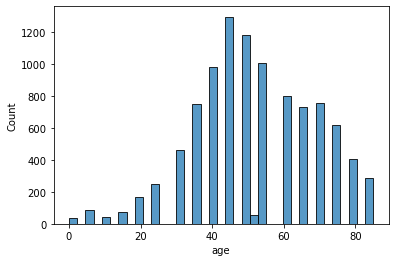

In [5]:
sns.histplot(skin_met.age);

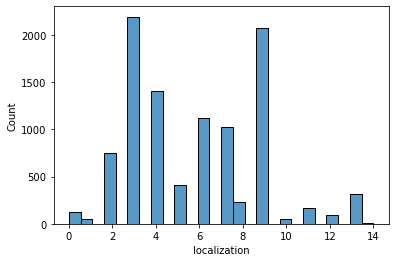

In [6]:
sns.histplot(skin_met.localization);

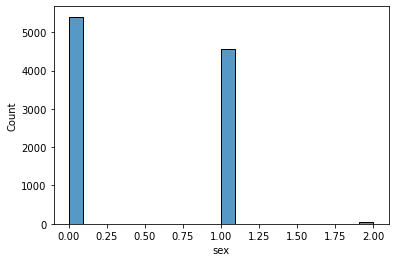

In [7]:
sns.histplot(skin_met.sex);

Note: Male = 0, Female = 1

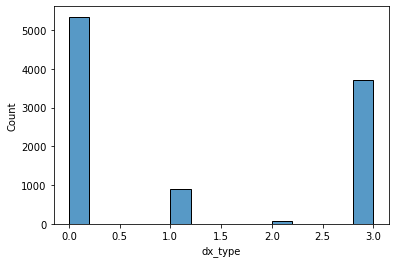

In [8]:
sns.histplot(skin_met.dx_type);

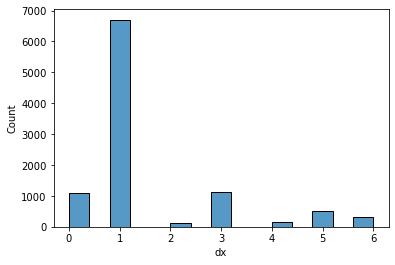

In [9]:
sns.histplot(skin_met.dx);

#### Emptiness
Are all values non-null where mandatory? E.g. client IDs

In [10]:
#Check for missing values
print("Missing values:",skin_met.isna().sum().sum())

Missing values: 0


Have a look at the high cardinality features

In [11]:
# Find high cardinality features
high_cardinality = (skin_met
     .select_dtypes(include=['int64'])
     .apply(lambda x: x.nunique(), axis=0) # columns
     .sort_values(ascending=False)
)
high_cardinality

image_id        10015
lesion_id        7470
age                19
localization       15
dx                  7
dx_type             4
sex                 3
dtype: int64

#### * Uniqueness
Are duplicates present where undesired? E.g. client IDs

In [13]:
print(f'Data has {skin_met.shape[0]} rows. Number of unique rows is {skin_met.nunique()}.')

Data has 10015 rows. Number of unique rows is lesion_id        7470
image_id        10015
dx                  7
dx_type             4
sex                 3
localization       15
age                19
dtype: int64.


#### * Set Memberships
Are only allowed values chosen for categorical or ordinal fields? E.g. Female, Male, Unknown: -
#### All good

* Foreign Memberships
Are only allowed values chosen a field?
#### NA


* Regular Expressions
Some files need to stick to a pattern expressed by a regular expression. E.g. a lower-case character
followed by 6 digits.
#### NA


* Cross-field validation
Some fields can impact validity of other fields. E.g. a male person can’t be pregnant.
#### NA

### Drop unnecessary and redundant columns

In [14]:
#Drop redundant and unnecessary columns
skin_met.drop(columns=['lesion_id','image_id','dx','dx_type'],inplace=True)
skin_met.head()

,sex,localization,age
0,0,0,80
1,0,0,80
2,0,0,80
3,0,0,80
4,0,1,75


### Save clean data

In [15]:
skin_met.to_csv('skin_met_cleaned.csv',index=False)

In [16]:
skin_met = pd.read_csv('skin_met_cleaned.csv')
skin_met.head()

,sex,localization,age
0,0,0,80
1,0,0,80
2,0,0,80
3,0,0,80
4,0,1,75


### Join hmnist dataset with the metadata and save to new csv file

In [24]:
data = pd.read_csv("hmnist_28_28_RGB[1].csv")
data.head().T

,0,1,2,3,4
pixel0000,192,25,192,38,158
pixel0001,153,14,138,19,113
pixel0002,193,30,153,30,139
pixel0003,195,68,200,95,194
pixel0004,155,48,145,59,144
...,...,...,...,...,...
pixel2348,166,28,142,17,149
pixel2349,185,25,136,25,109
pixel2350,154,14,104,12,78
pixel2351,177,27,117,15,92


In [25]:
data_joined = data.join(skin_met)
data_joined.head().T

,0,1,2,3,4
pixel0000,192,25,192,38,158
pixel0001,153,14,138,19,113
pixel0002,193,30,153,30,139
pixel0003,195,68,200,95,194
pixel0004,155,48,145,59,144
...,...,...,...,...,...
pixel2351,177,27,117,15,92
label,2,2,2,2,2
sex,0,0,0,0,0
localization,0,0,0,0,1


In [26]:
data_joined.to_csv('skin_ham_met_joined.csv',index=False)

In [27]:
skindf = pd.read_csv('skin_ham_met_joined.csv')
skindf.head().T

,0,1,2,3,4
pixel0000,192,25,192,38,158
pixel0001,153,14,138,19,113
pixel0002,193,30,153,30,139
pixel0003,195,68,200,95,194
pixel0004,155,48,145,59,144
...,...,...,...,...,...
pixel2351,177,27,117,15,92
label,2,2,2,2,2
sex,0,0,0,0,0
localization,0,0,0,0,1


In [28]:
skindf.to_csv('skindf.csv', index=False)

skindf=pd.read_csv('skindf.csv')
skindf.head().T

,0,1,2,3,4
pixel0000,192,25,192,38,158
pixel0001,153,14,138,19,113
pixel0002,193,30,153,30,139
pixel0003,195,68,200,95,194
pixel0004,155,48,145,59,144
...,...,...,...,...,...
pixel2351,177,27,117,15,92
label,2,2,2,2,2
sex,0,0,0,0,0
localization,0,0,0,0,1


In [29]:
skindf.shape

(10015, 2356)